<a href="https://colab.research.google.com/github/sgathai/dsc-data-serialization-lab/blob/master/dspt_phase_4_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

**Overview of the lecture**

1. Dimensionality reduction
2. PCA
3. Review tSNE



## What is dimensionality reduction?

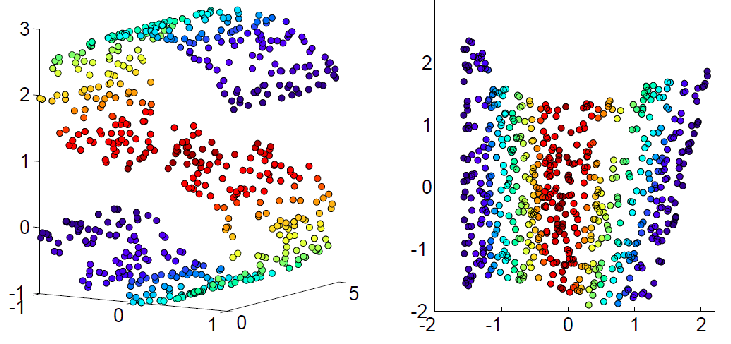

In [ ]:
#@title
# transformation of data from a high-dimensional space into a low-dimensional
# space so that the low-dimensional representation retains some meaningful properties of the original data

### Why is it important?

Because of [curse of dimensionality](https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e)

1. Overfitting when we have more features than observations
2. Too many dimensions causes observations to appear equidistant thus no meaningful clusters can be formed.

### Some dimensionality reduction techniques

1. Principal Component Analysis
2. Factor Analysis (FA)
3. Linear Discriminant Analysis (LDA)
4. t-distributed Stochastic Neighbor Embedding (t-SNE)
5. Kernel PCA

etc.


## What is PCA?


In [ ]:
#@title
#Principal component analysis - transforms a number of correlated variables into
#a (smaller) number of uncorrelated variables called principal components.

### How we get the principal components


1. Center the data around the origin  
    * Compute mean of the data
    * Subtract the mean from the data
2. Compute the covariance matrix of the centered data
3. Diagonalize matrix C(get eigenvalues and eigenvectors)


### Let's try implementing our own PCA

In [ ]:
# needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context='talk',style='white',palette='colorblind')
from sklearn.decomposition import PCA

In [ ]:
def center_data(x):
    mean = sum(x) / len(x)
    centered_x = [xi - mean for xi in x]
    return centered_x

In [ ]:
x = np.array([[1,2,3],
              [4,5,6]])

x-np.mean(x, axis=0)

array([[-1.5, -1.5, -1.5],
       [ 1.5,  1.5,  1.5]])

In [ ]:
center_data(x)

[array([-1.5, -1.5, -1.5]), array([1.5, 1.5, 1.5])]

In [ ]:
def PCA_manual(data):
    '''
    Function that performs PCA on the input data
    input: data
    output:
        fraction_variance_explained
        principal_components
    '''
    ### NOTE: Make sure the function returns the PCs sorted by the fraction of variance explained! ###
    ###       (First column of principal_components should hold the PC with the highest variance   ###
    ###       explained -- fraction_variance_explained should also be sorted accordingly)          ###

    # INSERT YOUR CODE HERE
    # find the mean
    mean = np.mean(data, axis=0)
    # subtract mean from data
    sb = data - mean

    # find covariance matrix
    cov_matrix = np.cov(sb.T)

    # find eigenvalues and eigenvectors
    eigenvalues, principal_components = np.linalg.eig(cov_matrix)

    sum_eigenvalues =sum(eigenvalues)
    fraction_variance_explained = eigenvalues/sum_eigenvalues
    print(principal_components)

    return fraction_variance_explained,principal_components

In [ ]:
def PCA_manual2(data):
    # Center the data around the origin
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    # Compute the covariance matrix of the centered data
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Diagonalize the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and eigenvectors by descending order of eigenvalues
    sorted_indices = np.argsort(eigenvalues)
    # Sort eigenvalues and eigenvectors by descending order of eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_indices]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]

    # Compute fraction of variance explained by each principal component
    total_variance = np.sum(eigenvalues)
    fraction_variance_explained = eigenvalues / total_variance

    # Compute the principal components
    principal_components = np.dot(centered_data, eigenvectors)
    print(principal_components)

    return fraction_variance_explained, principal_components

In [ ]:
?np.linalg.eig

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.drop('median_house_value', inplace=True, axis=1)

In [ ]:
df.shape

(17000, 8)

In [ ]:
X = df.values

In [ ]:
var_expl, PCs = PCA_manual(X)

[[-4.87779818e-05 -4.26597318e-04  5.96219142e-05 -4.44385427e-03
   1.75541809e-02 -6.74717920e-01  7.21374533e-01 -1.55069103e-01]
 [ 4.83304787e-05  5.92830386e-04  1.77408305e-04  1.06187208e-03
  -1.74489015e-03  7.32744210e-01  6.80044316e-01 -2.49217466e-02]
 [ 1.81139134e-03 -1.66615756e-03 -3.76947307e-03  1.92770694e-02
  -9.99629800e-01 -1.37056902e-02  1.22883216e-02  3.08899604e-03]
 [-8.78741371e-01  4.53645869e-01  1.47944433e-01  1.10543662e-02
  -2.69649914e-03 -2.38305870e-04 -1.89670088e-04 -1.38217673e-03]
 [-1.61685692e-01 -5.45364032e-02 -7.45061966e-01 -6.44666720e-01
  -9.82541906e-03  1.70970188e-03 -2.97587618e-04  8.45312761e-03]
 [-4.24259252e-01 -8.83742060e-01  1.93001366e-01 -4.18662496e-02
  -8.38430316e-04  7.41671895e-04  4.00401040e-05  7.02897990e-04]
 [-1.47214563e-01 -1.01124591e-01 -6.21059166e-01  7.62939997e-01
   1.69922297e-02 -2.22759232e-03  1.37517588e-03 -3.76480287e-03]
 [-1.17264926e-04  1.29843611e-03  4.10522619e-03  7.74073892e-03
   

In [ ]:
PCs.shape

(8, 8)

In [ ]:
var_expl, PCs = PCA_manual2(X)

[[-2.54846295e+03  1.67536843e+03 -1.76694599e+02 ... -3.87855828e+00
   1.49299273e+00 -1.17934595e+00]
 [-4.48629302e+03  2.46635269e+03 -3.08054162e+02 ... -3.02456216e+00
   1.03383083e+00  1.69609080e+00]
 [ 2.27125884e+03  1.55221708e+02  1.46770304e+01 ... -4.56270822e+00
   1.76011226e+00 -2.72238114e+00]
 ...
 [ 5.74349776e+01  1.84177704e+02  3.50888330e+00 ...  7.92471923e+00
   4.81534712e-01 -3.75001757e-01]
 [ 3.22883092e+01  1.30812676e+02 -1.61302311e+01 ...  7.98808585e+00
   3.68890616e-01 -1.26676638e+00]
 [ 1.06113653e+03  2.13830213e+02  7.96799915e+01 ...  6.42640683e+00
  -5.26953677e-02 -6.18891334e-01]]


In [ ]:
PCs.shape

(17000, 8)

In [ ]:
var_expl

array([9.50269599e-01, 4.45517308e-02, 4.74575399e-03, 4.09914188e-04,
       2.13266889e-05, 1.26246282e-06, 3.82186806e-08, 3.74819648e-07])

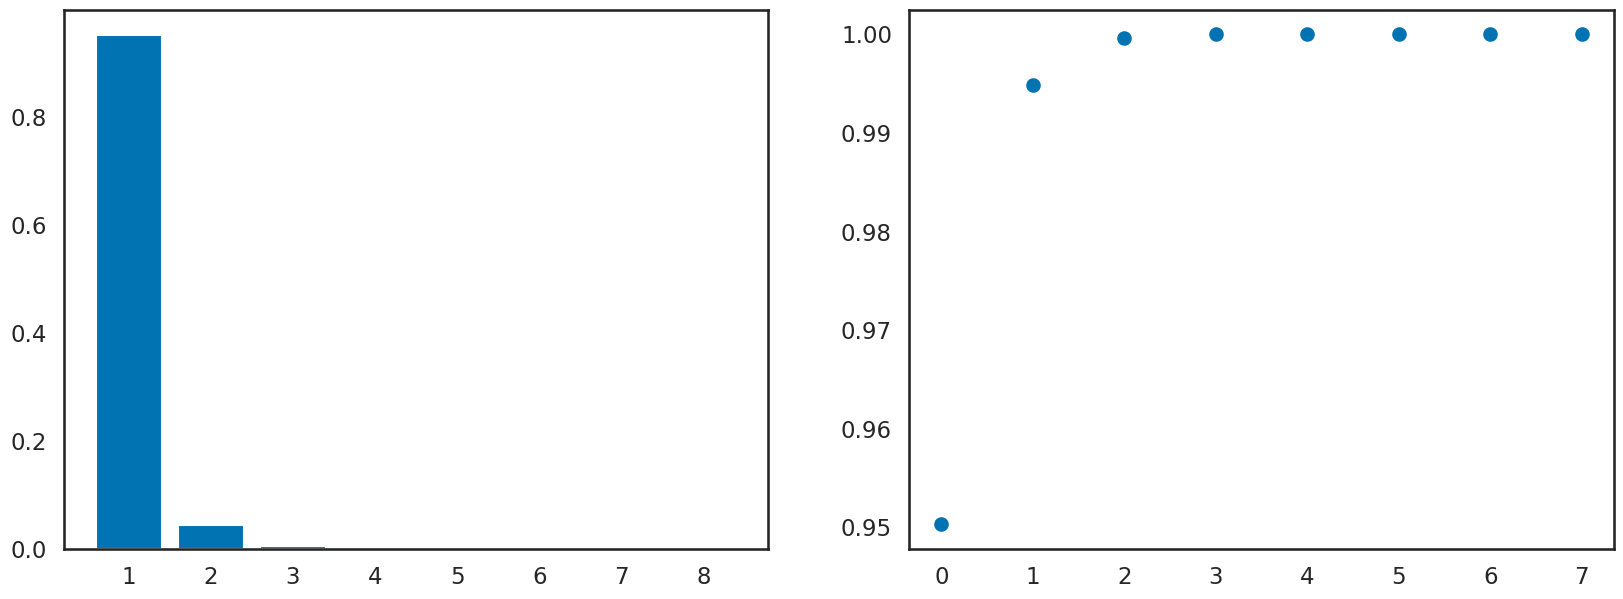

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.bar([str(i) for i in range(1,len(var_expl)+1)][:8], var_expl[:8])

plt.subplot(122)
plt.scatter([i for i in range(len(var_expl))][:8], np.cumsum(var_expl)[:8])

### Sklearn PCA

In [ ]:
def PCA_sklearn(data):
    '''
    Function that performs PCA on the input data, using sklearn
    '''
    pca = PCA(svd_solver='full').fit(data)
    data_transformed = pca.transform(data)
    print(data_transformed.shape)
    principal_components = pca.components_.T
    fraction_variance_explained = pca.explained_variance_ratio_

    return fraction_variance_explained, principal_components

In [ ]:
var_expl2, PCs2 = PCA_sklearn(X)

(17000, 8)


In [ ]:
PCs2.shape

(8, 8)

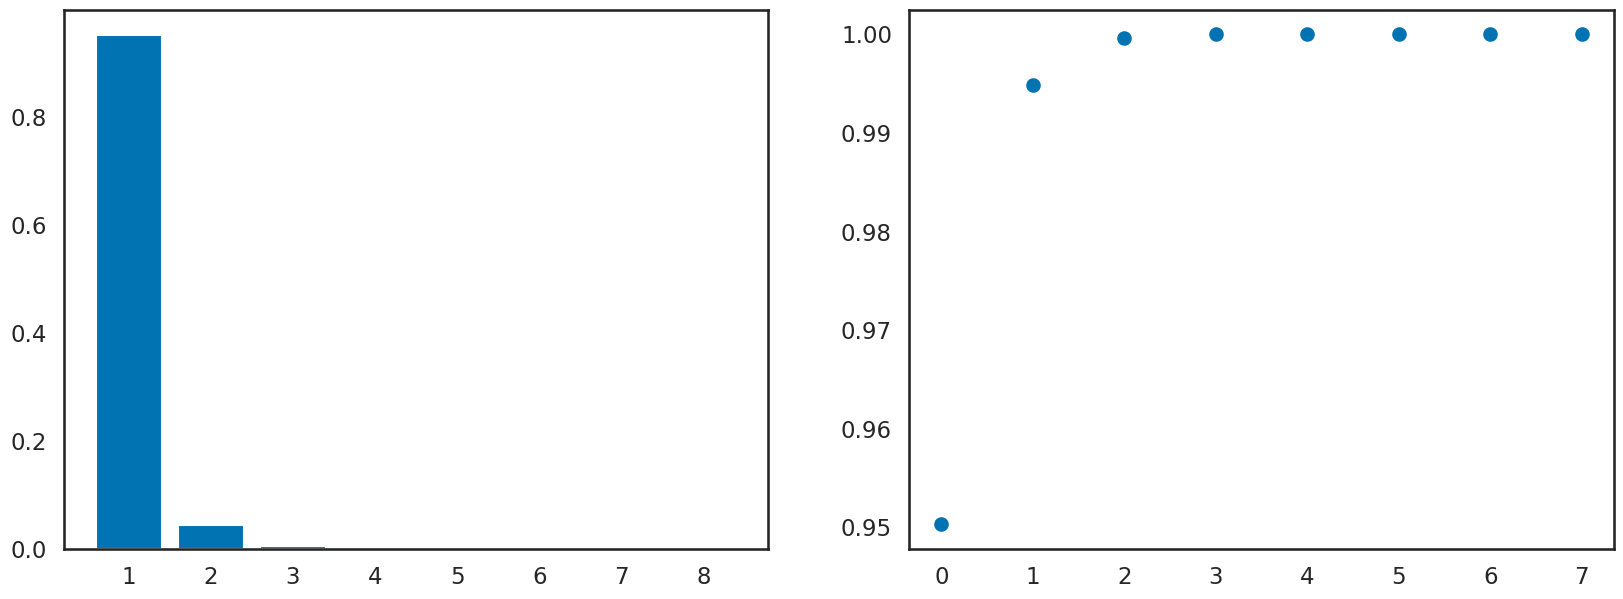

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.bar([str(i) for i in range(1,len(var_expl2)+1)][:8], var_expl2[:8])

plt.subplot(122)
plt.scatter([i for i in range(len(var_expl2))][:8], np.cumsum(var_expl2)[:8])

[Extra Reading](https://online.stat.psu.edu/stat505/lesson/11/11.4)

In [ ]:
PCs.shape # eigenvector/Principal Components

(8, 8)

In [ ]:
X_trans = np.dot(X,PCs)

In [ ]:
X_trans.shape

(17000, 8)

In [ ]:
model.fit(X_trans[:,:2])

In [ ]:
X_trans[:,:2]

array([[-5639.01350687,  1531.20739417],
       [-7576.84357683,  2322.19165638],
       [ -819.29171591,    11.06067088],
       ...,
       [-3033.11557911,    40.01666691],
       [-3058.26224761,   -13.34836058],
       [-2029.41402809,    69.66917592]])